# **🌾 Introduction**

This project, part of the Innovative AI Challenge 2024, focuses on Challenge 1: Developing AI Models to Increase Agricultural Productivity. The goal is to predict Crop Yield (kg/ha) using features like 🌧️ Rainfall, 🌱 Soil Type, and 🚜 Irrigation Area, and to build a robust regression model for accurate predictions.

In Part 1, we developed a model achieving:

**MSE: 43,991.71**
**R² Score: 98.60%**

**Next, in Part 2, we will explore detailed visualizations for deeper insights 📊,** and in Part 3, build a complete AI solution incorporating crop type, weather, and soil properties. The final deliverable includes a farmer-friendly interface, analysis, and a video demonstration.

**Stay tuned for the next steps as we strive to enhance agricultural productivity with AI! 🌱✨**



# **🧠 Data Understanding:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train_data=pd.read_csv("/kaggle/input/innovative-ai-challenge-2024/train.csv")
test_data=pd.read_csv("/kaggle/input/innovative-ai-challenge-2024/test.csv")

In [3]:
train_data

,id,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,1,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,3,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,4,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,5,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,6,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,7,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,8,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,9,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,10,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


In [4]:
print('train_data: ',train_data.shape)
print('test_data: ',test_data.shape)

train_data:  (55, 8)
test_data:  (8, 7)


In [5]:
print('train_data: ',train_data.columns)
print('test_data: ',test_data.columns)

train_data:  Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')
test_data:  Index(['id', 'Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area'],
      dtype='object')


In [6]:
train_data.describe()

,id,Year,Rainfall,Irrigation_Area,Crop_Yield (kg/ha)
count,55.00000,55.000000,55.000000,55.000000,55.000000
mean,28.00000,2009.527273,473.881818,2082.207273,3079.418182
std,16.02082,6.394021,106.836760,1495.190498,1706.608372
min,1.00000,2000.000000,218.900000,1.200000,0.000000
25%,14.50000,2004.000000,391.900000,5.500000,985.500000
50%,28.00000,2009.000000,459.500000,2721.800000,3943.000000
75%,41.50000,2015.000000,561.400000,3393.250000,4305.500000
max,55.00000,2021.000000,662.800000,3515.200000,5188.000000


**🔍 Explore Columns and Data Types**

- Column description:

🆔 id: A unique identifier for each data point.

📅 Year: The year when the data was collected (e.g., 2020, 2002).

🗺️ State: The state or region where the data was recorded (e.g., Punjab, Maharashtra).

🌾 Crop_Type: The type of crop grown (e.g., Rice, Wheat, Bajra).

🌧️ Rainfall: The average annual rainfall in the region (measured in mm).

🌱 Soil_Type: The type of soil in the region (e.g., Loamy, Sandy, Clay).

🚜 Irrigation_Area: The area of irrigated land in thousand hectares.

📈 Crop_Yield (kg/ha): The target variable representing the crop yield in kilograms per hectare (numeric value).

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  55 non-null     int64  
 1   Year                55 non-null     int64  
 2   State               55 non-null     object 
 3   Crop_Type           55 non-null     object 
 4   Rainfall            55 non-null     float64
 5   Soil_Type           55 non-null     object 
 6   Irrigation_Area     55 non-null     float64
 7   Crop_Yield (kg/ha)  55 non-null     int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 3.6+ KB


In [8]:
train_data.drop(columns=['id'],inplace=True)

In [9]:
train_data

,Year,State,Crop_Type,Rainfall,Soil_Type,Irrigation_Area,Crop_Yield (kg/ha)
0,2019,Punjab,Wheat,578.6,Loamy,3515.2,5188
1,2018,Punjab,Wheat,598.3,Loamy,3499.3,5077
2,2017,Punjab,Wheat,493.0,Loamy,3467.7,5046
3,2016,Punjab,Wheat,426.7,Loamy,3474.6,4583
4,2015,Punjab,Wheat,546.9,Loamy,3474.7,4304
5,2014,Punjab,Wheat,384.9,Loamy,3474.7,5017
6,2013,Punjab,Wheat,619.7,Loamy,3488.1,4724
7,2011,Punjab,Wheat,218.9,Loamy,3466.9,4693
8,2010,Punjab,Wheat,472.1,Loamy,3474.8,4307
9,2009,Punjab,Wheat,384.9,Loamy,3474.8,4462


# **🛠️ Data Preprocessing**

**🚨 Missing Values and Duplicate Values**

In [10]:
train_data.isnull().sum()

Year                  0
State                 0
Crop_Type             0
Rainfall              0
Soil_Type             0
Irrigation_Area       0
Crop_Yield (kg/ha)    0
dtype: int64

**No missing values across any of the columns. This ensures that the data is clean and ready for exploratory data analysis (EDA) and model building**

In [11]:
train_data.duplicated().sum()

0

**🔢 Numerical and Categorical Columns**

In [12]:
target_col='Crop_Yield (kg/ha)'
num_col=train_data.select_dtypes(include=['number']).columns
cat_col=train_data.select_dtypes(include=['object']).columns
print("Target Columns: ",target_col)
print("\nNumrical Column: ",num_col.tolist())
print("\nCategorical Column: ",cat_col.tolist())

Target Columns:  Crop_Yield (kg/ha)

Numrical Column:  ['Year', 'Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)']

Categorical Column:  ['State', 'Crop_Type', 'Soil_Type']


In [13]:
num_data=train_data.select_dtypes(include=['number'])
cat_data=train_data.select_dtypes(include=['object'])

In [14]:
num_data.kurtosis()

Year                 -1.184017
Rainfall             -0.379929
Irrigation_Area      -1.499066
Crop_Yield (kg/ha)   -1.297259
dtype: float64

In [15]:
print('Numerical Data Distribution!')
num_data.describe().round(2).T

Numerical Data Distribution!


,count,mean,std,min,25%,50%,75%,max
Year,55.0,2009.53,6.39,2000.0,2004.0,2009.0,2015.00,2021.0
Rainfall,55.0,473.88,106.84,218.9,391.9,459.5,561.40,662.8
Irrigation_Area,55.0,2082.21,1495.19,1.2,5.5,2721.8,3393.25,3515.2
Crop_Yield (kg/ha),55.0,3079.42,1706.61,0.0,985.5,3943.0,4305.50,5188.0


In [16]:
print("Categorical Data Dsicription!")
cat_data.describe().T

Categorical Data Dsicription!


,count,unique,top,freq
State,55,1,Punjab,55
Crop_Type,55,3,Wheat,19
Soil_Type,55,2,Loamy,37


In [17]:
for c in cat_data:
    col_count=train_data[c].nunique()
    print(f'{c} has {col_count} unique values.')
    print("**"*20)

State has 1 unique values.
****************************************
Crop_Type has 3 unique values.
****************************************
Soil_Type has 2 unique values.
****************************************


In [18]:
for i in cat_col:
    cat_value=train_data[i].value_counts()
    print(f'value count for {i} is :')
    print(cat_value)
    print("-"*20)
    

value count for State is :
State
Punjab    55
Name: count, dtype: int64
--------------------
value count for Crop_Type is :
Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64
--------------------
value count for Soil_Type is :
Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64
--------------------


# **🔍📈 Exploratory Data Analysis (EDA) **

**Univariate Analysis 📊✨**

**1.Distribution of Numerical Column**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


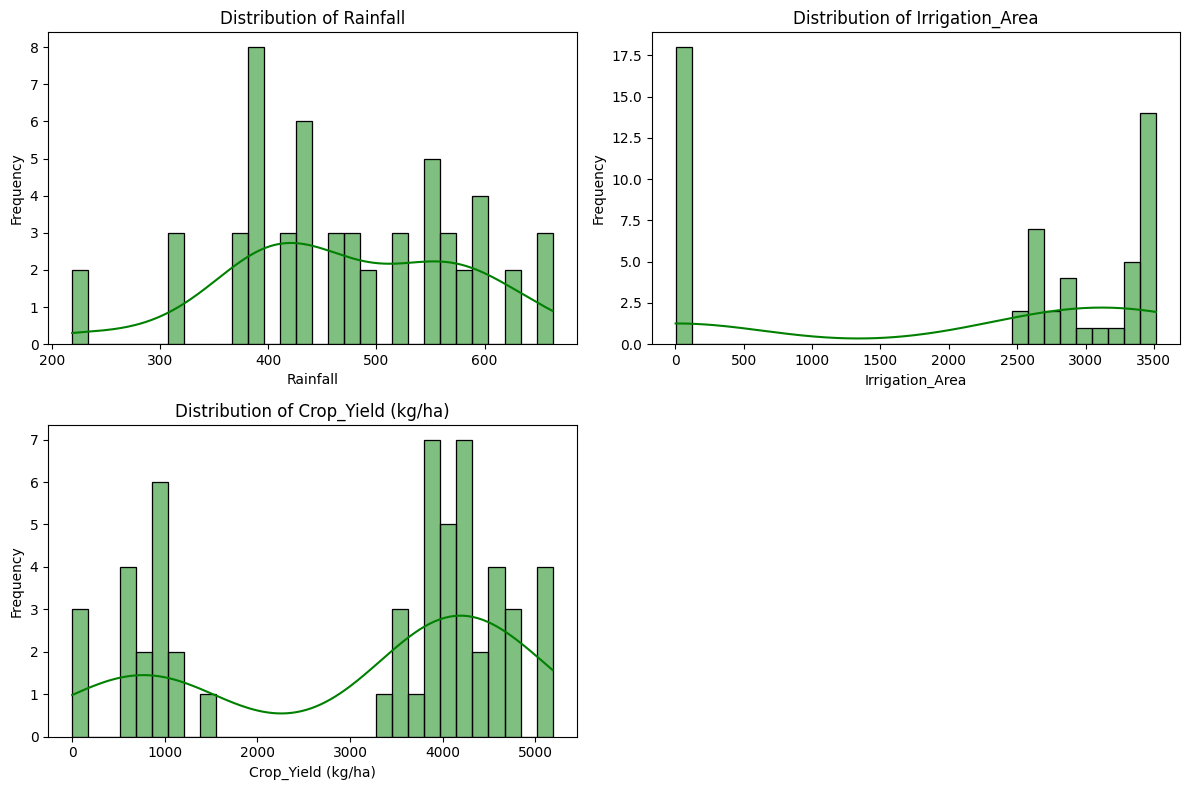

In [19]:
numerical_col = ['Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)']
plt.figure(figsize=(12, 8))  # Set the figure size for all subplots
plot_num = 1

for col in numerical_col:
    if plot_num <= 3:  # Limit the number of subplots to match the number of columns
        plt.subplot(2, 2, plot_num)  # Create a 2x2 grid of subplots
        sns.histplot(data=train_data, x=col, kde=True, bins=30, color='green')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plot_num += 1

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()


- The distributions of rainfall, irrigation area, and crop yield show varying degrees of skewness, with rainfall being the most skewed, followed by irrigation area, and crop yield being relatively less skewed.

**2.What are the counts of each state, crop type, and soil type in the dataset**

Value counts for State:
State
Punjab    55
Name: count, dtype: int64

Value counts for Crop_Type:
Crop_Type
Wheat    19
Rice     18
Bajra    18
Name: count, dtype: int64

Value counts for Soil_Type:
Soil_Type
Loamy       37
alluvial    18
Name: count, dtype: int64



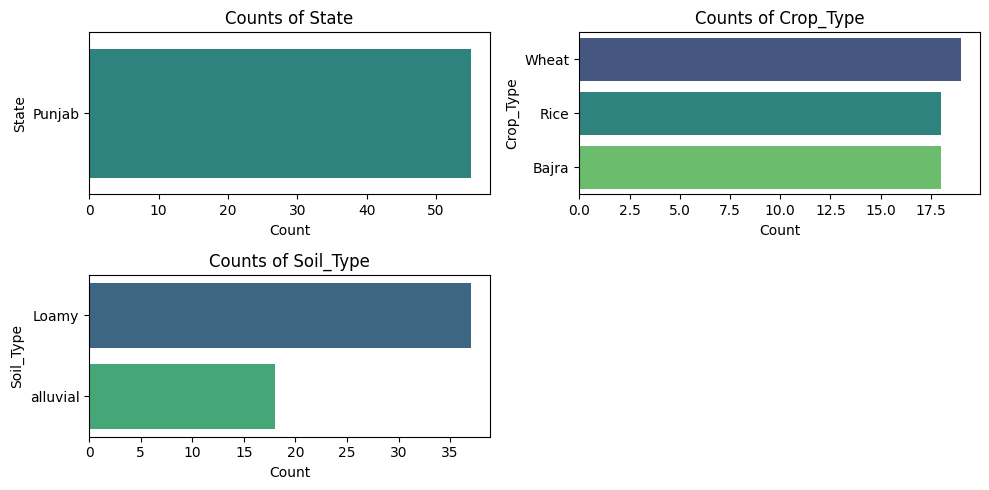

In [20]:
categorical_columns = ['State', 'Crop_Type', 'Soil_Type']
for col in categorical_columns:
    print(f"Value counts for {col}:\n{train_data[col].value_counts()}\n")

plot_num=1
plt.figure(figsize=(10, 5))
for col in categorical_columns:
    if plot_num <=3:
        plt.subplot(2,2,plot_num)
        sns.countplot(data=train_data, y=col, palette='viridis', order=train_data[col].value_counts().index)
        plt.title(f'Counts of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plot_num +=1
plt.tight_layout()
plt.show()


**3. What is the relationship between irrigation area and crop yield?**

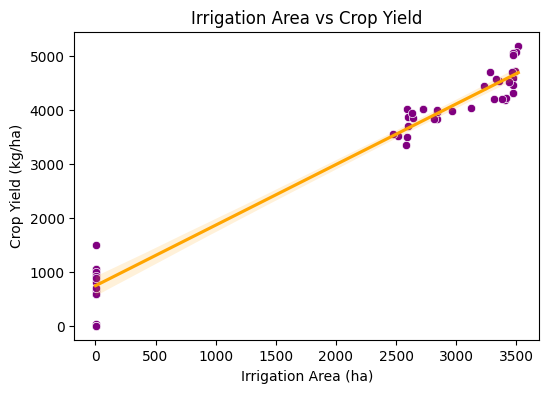

In [21]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Irrigation_Area', y='Crop_Yield (kg/ha)', color='purple')
sns.regplot(data=train_data, x='Irrigation_Area', y='Crop_Yield (kg/ha)', scatter=False, color='orange')
plt.title('Irrigation Area vs Crop Yield')
plt.xlabel('Irrigation Area (ha)')
plt.ylabel('Crop Yield (kg/ha)')
plt.show()


- The scatter plot and regression line show a positive correlation between irrigation area and crop yield, suggesting that increasing irrigation area tends to be associated with higher crop yields.

**Bivariate Analysis 🔗📉**

**4.How does rainfall affect crop yield?**

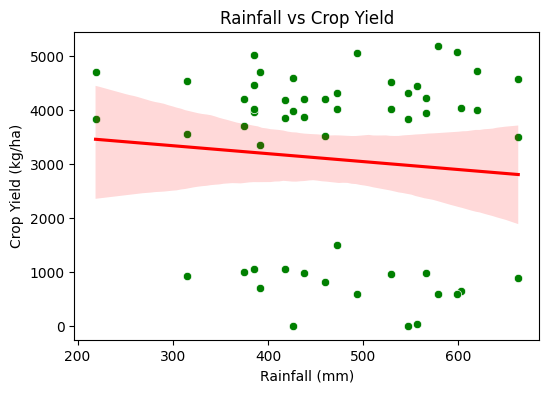

In [22]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Rainfall', y='Crop_Yield (kg/ha)', color='green')
sns.regplot(data=train_data, x='Rainfall', y='Crop_Yield (kg/ha)', scatter=False, color='red')
plt.title('Rainfall vs Crop Yield')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Crop Yield (kg/ha)')
plt.show()


- The relationship between rainfall and crop yield appears to be weak and negative, suggesting that higher rainfall may be associated with slightly lower crop yields

**5.What is the relationship between irrigation area and crop yield?**

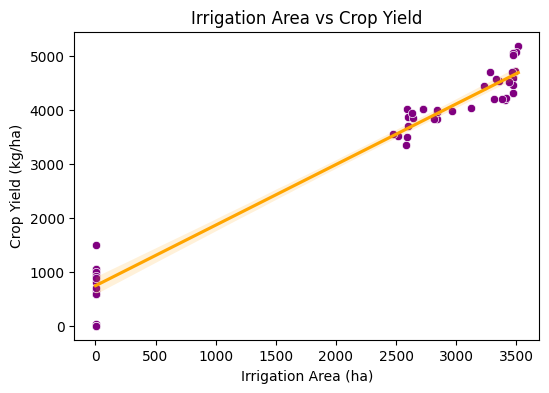

In [23]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=train_data, x='Irrigation_Area', y='Crop_Yield (kg/ha)', color='purple')
sns.regplot(data=train_data, x='Irrigation_Area', y='Crop_Yield (kg/ha)', scatter=False, color='orange')
plt.title('Irrigation Area vs Crop Yield')
plt.xlabel('Irrigation Area (ha)')
plt.ylabel('Crop Yield (kg/ha)')
plt.show()


- The scatter plot and regression line show a positive correlation between irrigation area and crop yield, suggesting that increasing irrigation area tends to be associated with higher crop yields.

**6.Does crop yield vary by state, crop type, or soil type?**

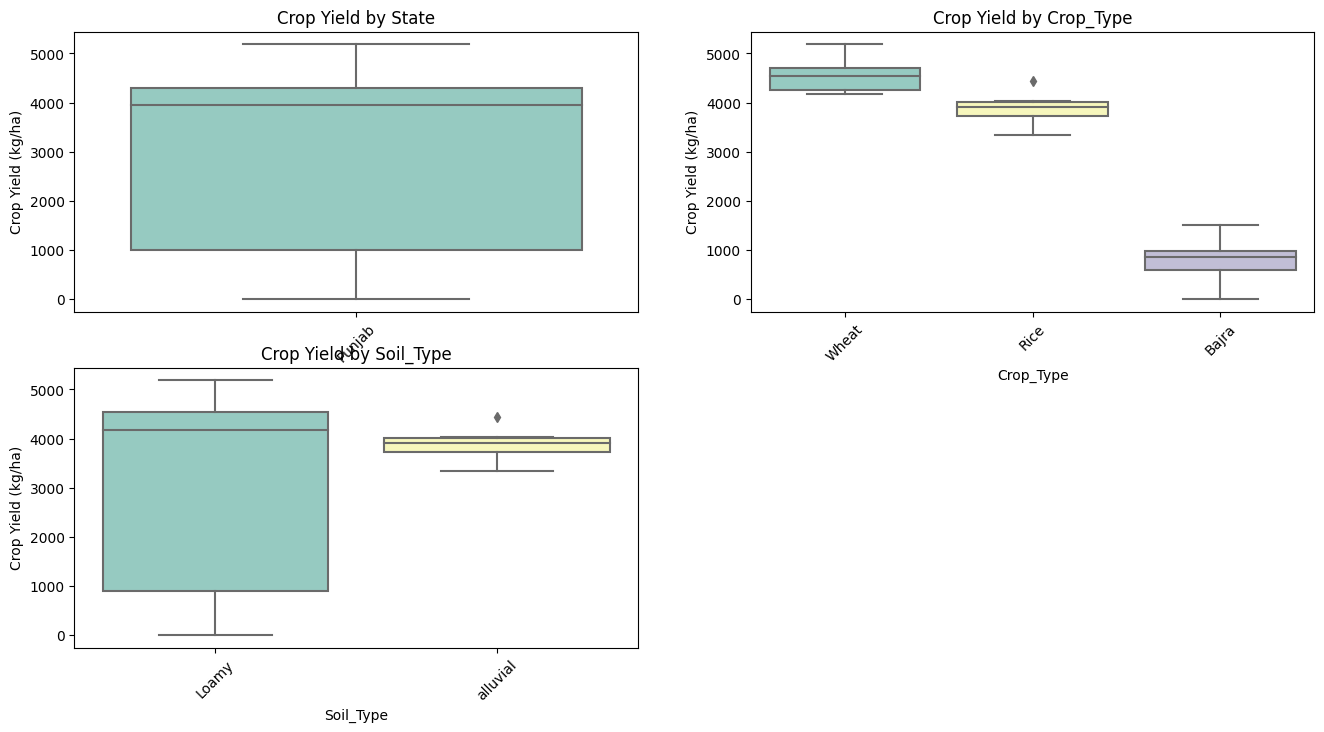

In [24]:
categorical_columns = ['State', 'Crop_Type', 'Soil_Type']
plt.figure(figsize=(16, 8))
plot_num=1
for col in categorical_columns:
    if plot_num<=3:
        plt.subplot(2,2,plot_num)
        sns.boxplot(data=train_data, x=col, y='Crop_Yield (kg/ha)', palette='Set3')
        plt.title(f'Crop Yield by {col}')
        plt.xlabel(col)
        plt.ylabel('Crop Yield (kg/ha)')
        plt.xticks(rotation=45)
        plot_num +=1
plt.show()


- Crop yield appears to be significantly influenced by crop type and soil type, but not by state.

**7. How has crop yield changed over the years?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


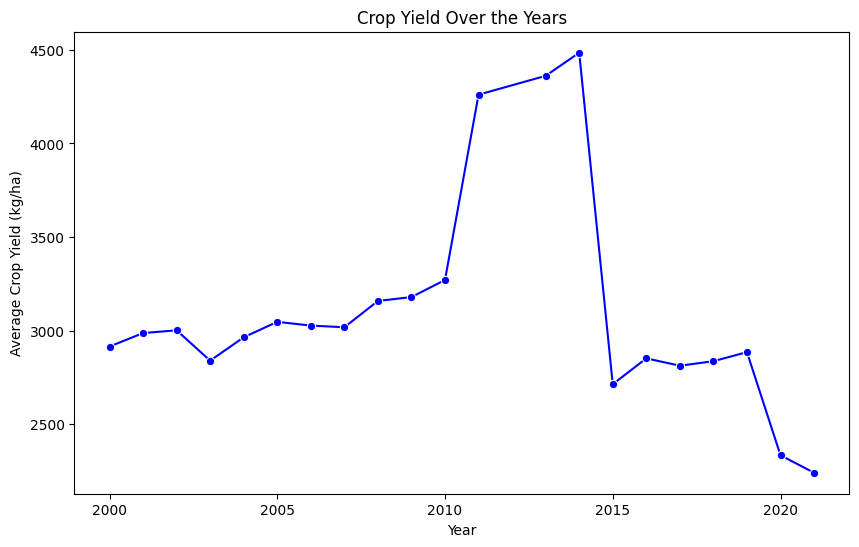

In [25]:
yearly_yield = train_data.groupby('Year')['Crop_Yield (kg/ha)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_yield, x='Year', y='Crop_Yield (kg/ha)', marker='o', color='blue')
plt.title('Crop Yield Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Crop Yield (kg/ha)')
plt.show()


**Multivariate Analysis 📊🔬✨**

 **8. How do rainfall and irrigation area together influence crop yield?**

In [35]:
import plotly.express as px

fig = px.scatter_3d(train_data, x='Rainfall', y='Irrigation_Area', z='Crop_Yield (kg/ha)', color='Crop_Type')
fig.update_layout(title='Rainfall, Irrigation Area, and Crop Yield')
fig.show()


-crop yield increases with both rainfall and irrigation area, but the extent of influence varies across crops, with wheat showing a stronger response compared to rice and bajra.

**9.How do different crop types perform in various states?**

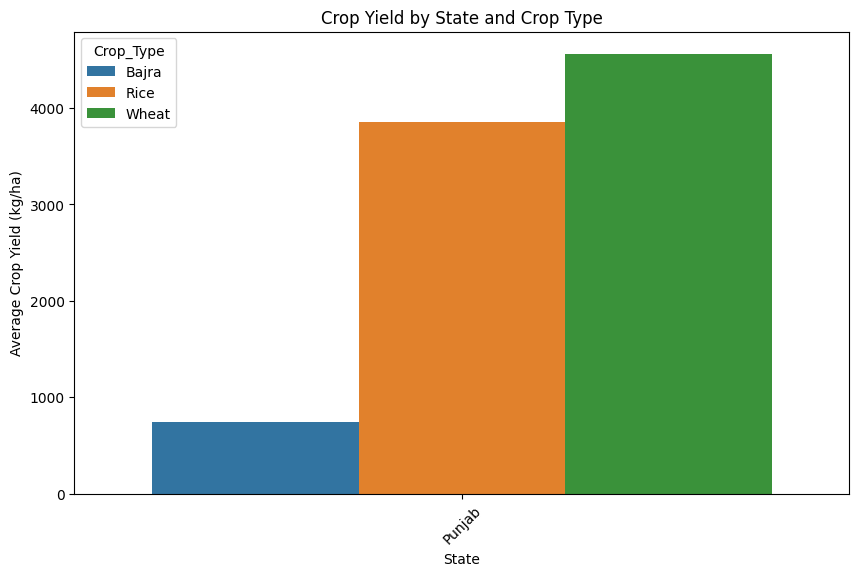

In [27]:
grouped_data = train_data.groupby(['State', 'Crop_Type'])['Crop_Yield (kg/ha)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='State', y='Crop_Yield (kg/ha)', hue='Crop_Type', palette='tab10')
plt.title('Crop Yield by State and Crop Type')
plt.xlabel('State')
plt.ylabel('Average Crop Yield (kg/ha)')
plt.xticks(rotation=45)
plt.show()


-  within Punjab, Wheat has the highest average yield, followed by Rice, and then Bajra.

**10.Does soil type impact the effectiveness of irrigation or rainfall on crop yield?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Figure size 1000x600 with 0 Axes>

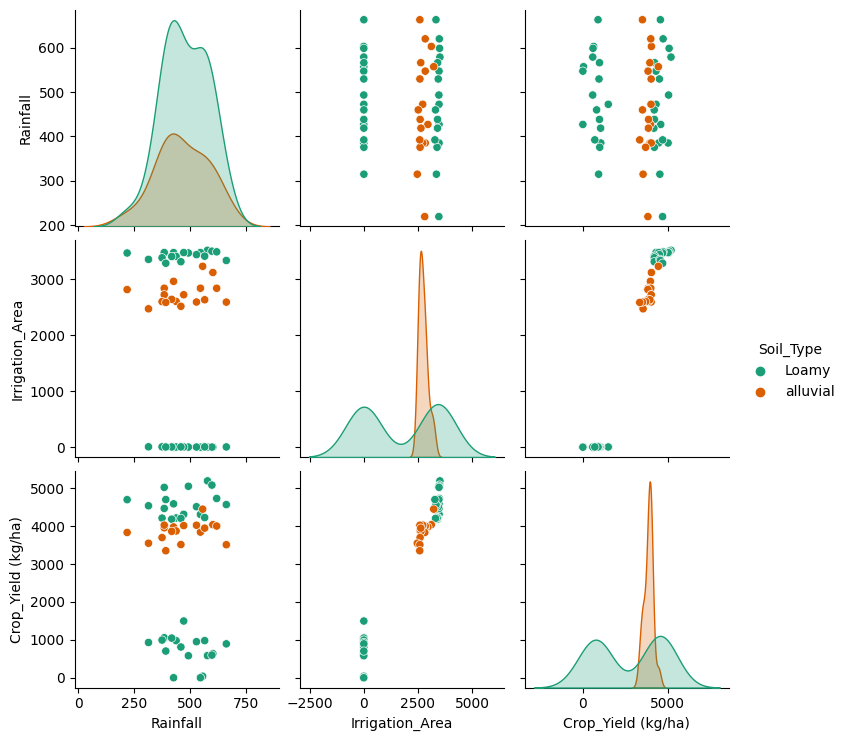

In [28]:
plt.figure(figsize=(10,6))
sns.pairplot(train_data, vars=['Rainfall', 'Irrigation_Area', 'Crop_Yield (kg/ha)'], hue='Soil_Type', palette='Dark2')
plt.show()


-  loamy soil shows higher variability in rainfall impact on crop yield, while alluvial soil exhibits a concentrated relationship between irrigation area and yield, suggesting soil type influences the effectiveness of irrigation and rainfall differently.

**Correlation and Trends 🔗📈🔍**

**11. Is there a trend in crop yield over time across different states or crop types?**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



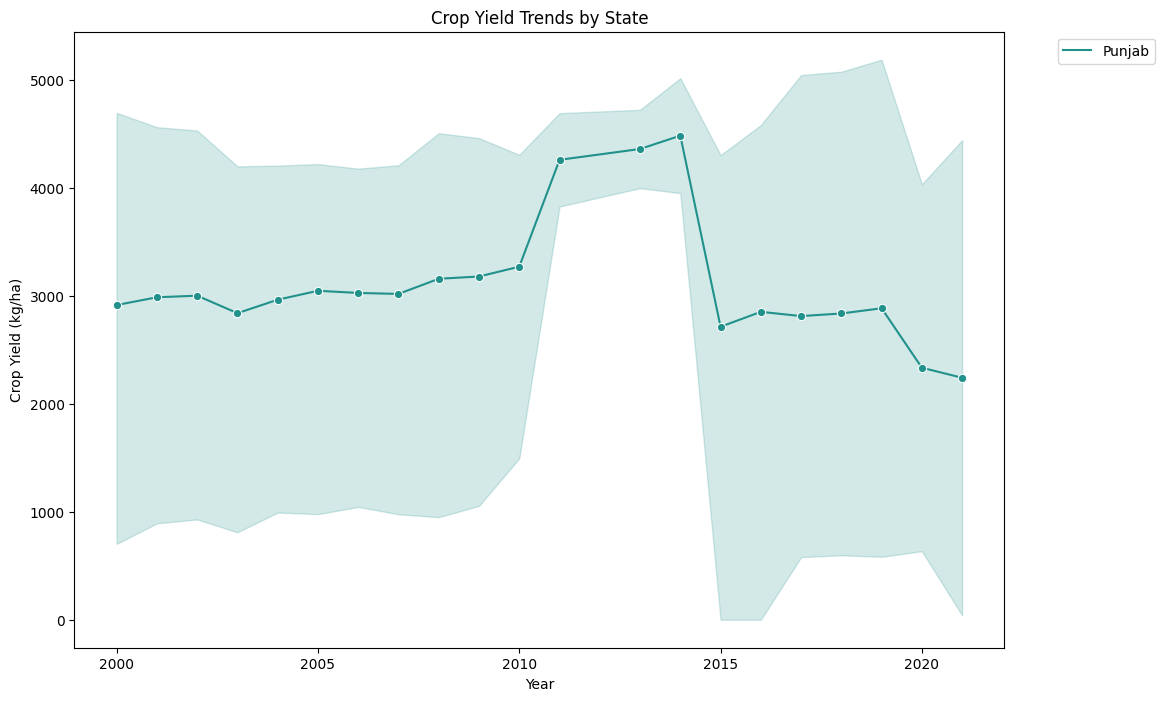

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=train_data, x='Year', y='Crop_Yield (kg/ha)', hue='State', marker='o', palette='viridis')
plt.title('Crop Yield Trends by State')
plt.xlabel('Year')
plt.ylabel('Crop Yield (kg/ha)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Crop yield showed a significant increase during the years 2010 to 2015, indicating a peak in agricultural productivity during this period. 🌾📈

**12.Which crops perform best under specific soil types and irrigation conditions?**

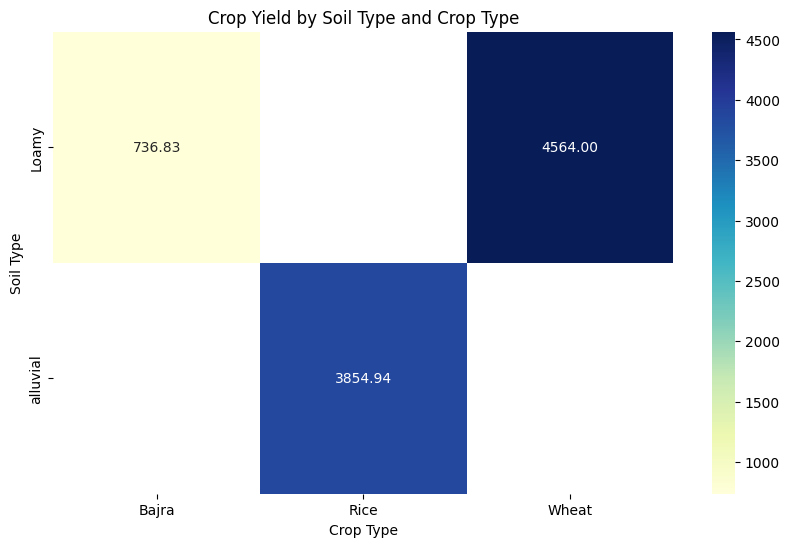

In [30]:
pivot_table = train_data.pivot_table(index='Soil_Type', columns='Crop_Type', values='Crop_Yield (kg/ha)', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Crop Yield by Soil Type and Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Soil Type')
plt.show()


- Wheat performs best in loamy soil (yield: 4564.00), while Rice performs best in alluvial soil (yield: 3854.94).

**13.What is the relative proportions of State, Crop_Type, and Soil_Type in the dataset**

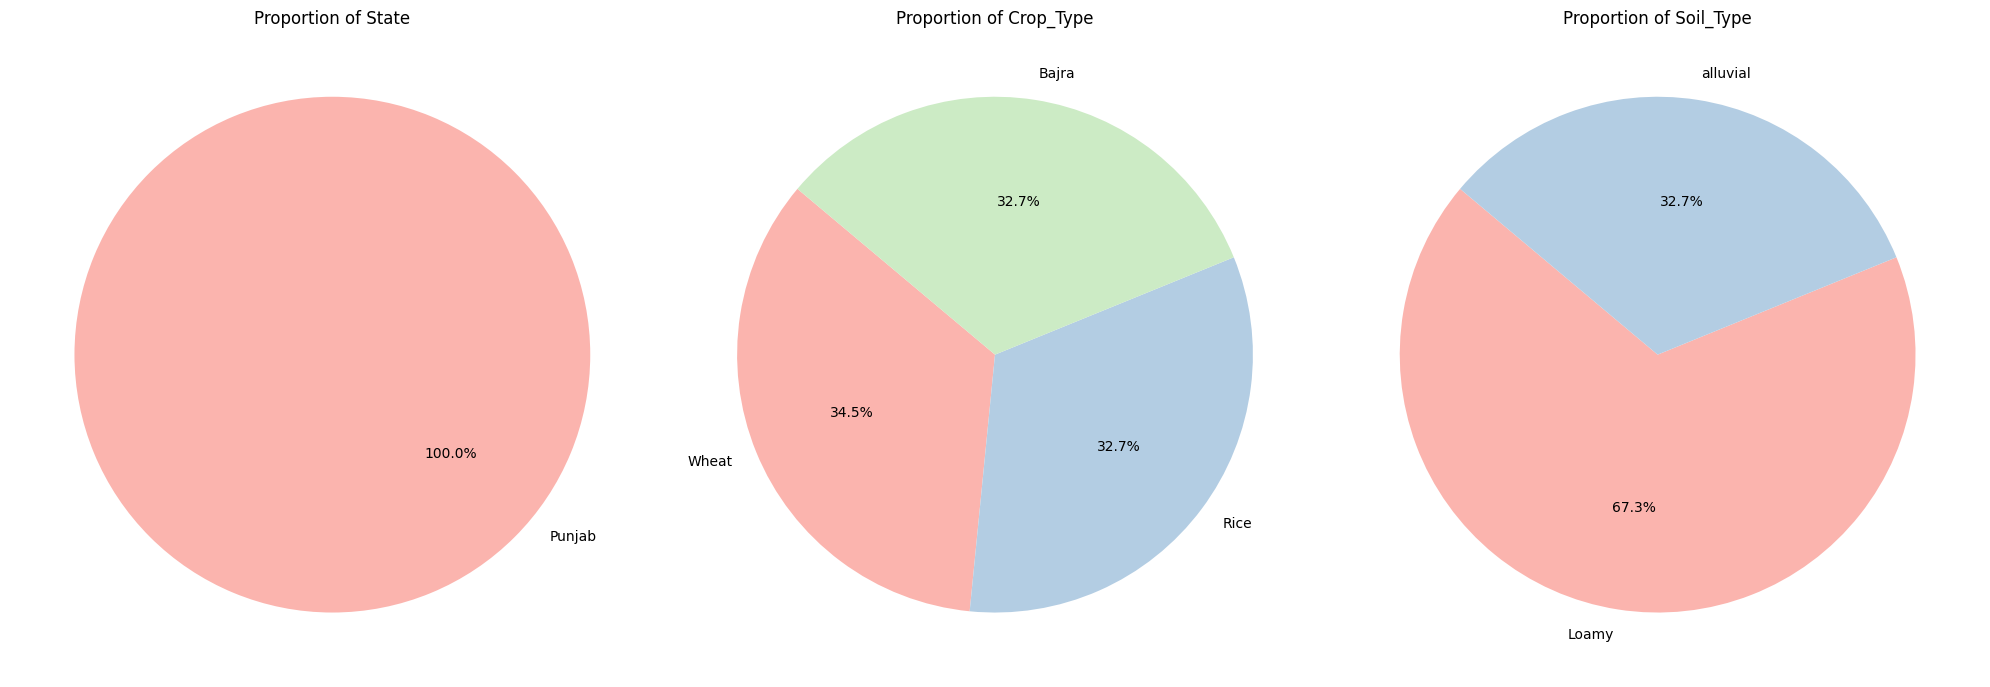

In [31]:
from matplotlib import cm
# Define categorical columns for pie chart
categorical_columns = ['State', 'Crop_Type', 'Soil_Type']

# Plotting pie charts
plt.figure(figsize=(20, 10))  # Set overall figure size
plot_num = 1
pastel_colors = cm.Pastel1.colors
for col in categorical_columns:
    plt.subplot(1, 3, plot_num)  # Create subplots
    data = train_data[col].value_counts()  # Get value counts for the column
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=pastel_colors[:len(data)])
    plt.title(f"Proportion of {col}")
    plot_num += 1

plt.tight_layout()
plt.show()

In [32]:
train_data.columns

Index(['Year', 'State', 'Crop_Type', 'Rainfall', 'Soil_Type',
       'Irrigation_Area', 'Crop_Yield (kg/ha)'],
      dtype='object')

**14.What is the distribution of crop types across the dataset?**

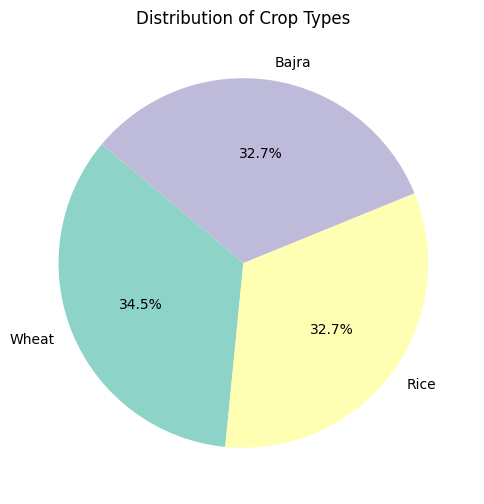

In [33]:
import matplotlib.pyplot as plt

# Data for crop types
crop_data = train_data['Crop_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(crop_data, labels=crop_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors[:len(crop_data)])
plt.title("Distribution of Crop Types")
plt.show()


**15.How are soil types distributed in the dataset?**

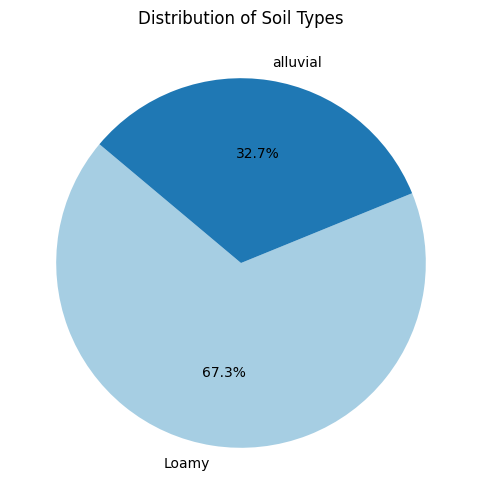

In [34]:
# Data for soil types
soil_data = train_data['Soil_Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(soil_data, labels=soil_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors[:len(soil_data)])
plt.title("Distribution of Soil Types")
plt.show()


# **🔚 Conclusion:**

In this notebook, we performed a comprehensive EDA to uncover insights from the dataset. Here's a summary of our findings:

**🌦️ Numerical Features:** Explored distributions of rainfall, irrigation area, and crop yield, identifying key patterns.

**🌱 Categorical Features:** Analyzed states, crop types, and soil types, revealing regional and agricultural diversity.

**📊 Pie Chart Distributions:** Visualized the proportion of states, crop types, and soil types to understand their relative representation in the dataset.

**📈 Input-Output Relationships:** Visualized how rainfall and irrigation impact crop yield, along with variability across states, crops, and soil types.

**📅 Trends:** Observed temporal patterns in crop yield across years and regions.

**💡 Correlations:** Highlighted key relationships among numerical features to guide feature selection.

**These insights lay a solid foundation for building a robust predictive model to improve agricultural productivity. 🚜✨**

# **🚀 If you found this notebook helpful, insightful, or inspiring, I would truly appreciate your upvote! Your support can help bring this notebook to the spotlight and make it shine in the competition🏆✨**

# **Thank you for your time and encouragement! 😊**